In [8]:
import numpy as np

class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        #self.b_ = 0. # same! #LS
        
        self.errors_ = [] # used only for reporting
        
        # calculate and print the number of initial errors #LS
        initial_errors = 0
        for xi, target in zip(X, y):
            if self.predict(xi) != target:
                initial_errors += 1
        print("initial errors: ", initial_errors)

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                print("xi: ", xi, "Target: ", target, "Prediction: ", self.predict(xi)) #LS
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            print("Errors: ", errors) #LS
        return self
    
    # In following 2 fns, changed variable arg name from X to x,
    # since X is a 2d array above, and a 1d array here. 
    # Using X works, but I think it's confusing. #LS
    
    # The dot product (np.dot) of two 1d arrays is what you get 
    # from multiplying corresponding values and adding up the results.

    def net_input(self, x):
        """Calculate net input"""
        return np.dot(x, self.w_) + self.b_

    def predict(self, x):
        """Return class label after unit step"""
        return np.where(self.net_input(x) >= 0.0, 1, 0)

In [ ]:
#Data is from the 2022 NBA season and it directly downloaded from the basketball-reference.com website. I have only used the first 20 rows of the data for this example.

#Predicts if someone got an award based on their assist to turnover ratio.

import pandas as pd

df = pd.read_csv('NBA2022.csv')

#df['assist-turnover-ratio'] = df['AST']/df['TOV']

#df['isAward'] = df['Awards'].notna().astype(int)

df_per_game_final = df[['FG', 'STL', 'Award']]

numRows = len(df_per_game_final)

df_per_game_final = df_per_game_final.sort_values(by='Award', ascending=False)

numIsAward = len(df_per_game_final[df_per_game_final['Award'] == 1])

print("Number with award =", numIsAward)


Number with award = 20


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0] 20


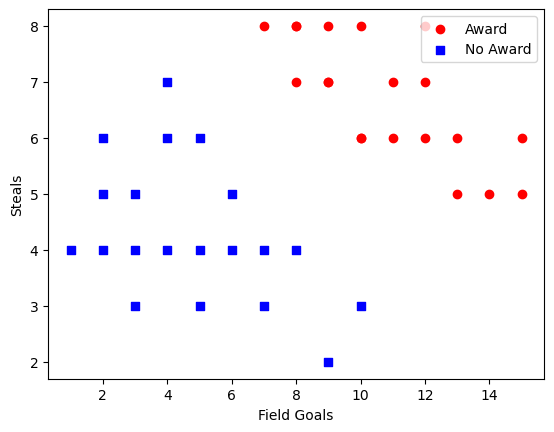

In [78]:

import matplotlib.pyplot as plt

y = df_per_game_final.iloc[0:numRows, 2].values
X = df_per_game_final.iloc[0:numRows, [0,1]].values

print(y, numIsAward)

plt.scatter(X[:numIsAward, 0], X[:numIsAward, 1],
            color='red', marker='o', label='Award')
plt.scatter(X[numIsAward:, 0], X[numIsAward:, 1],
            color='blue', marker='s', label='No Award')

plt.xlabel('Field Goals')
plt.ylabel('Steals')
plt.legend(loc='upper right')

plt.show()

initial errors:  18
xi:  [15  6] Target:  1 Prediction:  1
xi:  [12  7] Target:  1 Prediction:  1
xi:  [8 7] Target:  1 Prediction:  1
xi:  [12  8] Target:  1 Prediction:  1
xi:  [7 8] Target:  1 Prediction:  1
xi:  [15  5] Target:  1 Prediction:  1
xi:  [13  6] Target:  1 Prediction:  1
xi:  [9 7] Target:  1 Prediction:  1
xi:  [11  6] Target:  1 Prediction:  1
xi:  [8 8] Target:  1 Prediction:  1
xi:  [14  5] Target:  1 Prediction:  1
xi:  [10  6] Target:  1 Prediction:  1
xi:  [10  6] Target:  1 Prediction:  1
xi:  [9 7] Target:  1 Prediction:  1
xi:  [12  6] Target:  1 Prediction:  1
xi:  [11  7] Target:  1 Prediction:  1
xi:  [8 8] Target:  1 Prediction:  1
xi:  [10  8] Target:  1 Prediction:  1
xi:  [13  5] Target:  1 Prediction:  1
xi:  [9 8] Target:  1 Prediction:  1
xi:  [5 3] Target:  0 Prediction:  1
xi:  [7 4] Target:  0 Prediction:  0
xi:  [4 6] Target:  0 Prediction:  0
xi:  [6 4] Target:  0 Prediction:  0
xi:  [3 5] Target:  0 Prediction:  0
xi:  [3 4] Target:  0 Predict

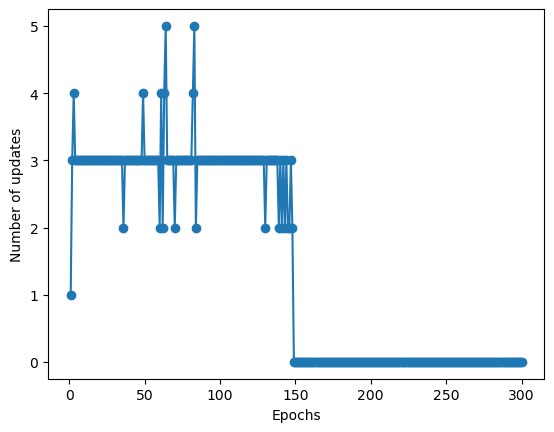

In [79]:

basketball_perceptron = Perceptron(0.01, 300)

basketball_perceptron.fit(X, y)

plt.plot(range(1, len(basketball_perceptron.errors_) + 1), basketball_perceptron.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()